In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
df = pd.read_csv("/content/BankNote_Authentication.csv")

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
x = df.drop('class', axis = 1).values
y = df['class'].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state =42)

In [ ]:
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))

x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [ ]:
x_test.shape

torch.Size([343, 4])

In [ ]:
y_test.shape

torch.Size([343, 1])

In [ ]:
y_train.shape

torch.Size([1029, 1])

In [ ]:
x_train.shape

torch.Size([1029, 4])

In [ ]:
torch.manual_seed(20)

In [ ]:

input_size = 4
hidden_sizes = [8, 4]
output_size = 1

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Sigmoid())
print(model)



Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)


In [ ]:
print(model[0])
model[0].weight


Linear(in_features=4, out_features=8, bias=True)


Parameter containing:
tensor([[-0.4848,  0.2072,  0.0548,  0.0564],
        [ 0.0547, -0.4201, -0.4260, -0.4585],
        [ 0.4209, -0.4463, -0.3296, -0.1230],
        [ 0.1058, -0.3777, -0.3215, -0.0892],
        [ 0.1423, -0.4637,  0.4581,  0.4809],
        [-0.2795,  0.1127, -0.4701, -0.1559],
        [-0.2498,  0.3165,  0.1867, -0.2657],
        [-0.3613,  0.1255,  0.2765, -0.3908]], requires_grad=True)

In [ ]:
print(model[0])
model[0].bias

Linear(in_features=4, out_features=8, bias=True)


Parameter containing:
tensor([-0.0514,  0.0212,  0.4176,  0.4629, -0.4185, -0.0265, -0.4942, -0.1780],
       requires_grad=True)

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.4848,  0.2072,  0.0548,  0.0564],
                      [ 0.0547, -0.4201, -0.4260, -0.4585],
                      [ 0.4209, -0.4463, -0.3296, -0.1230],
                      [ 0.1058, -0.3777, -0.3215, -0.0892],
                      [ 0.1423, -0.4637,  0.4581,  0.4809],
                      [-0.2795,  0.1127, -0.4701, -0.1559],
                      [-0.2498,  0.3165,  0.1867, -0.2657],
                      [-0.3613,  0.1255,  0.2765, -0.3908]])),
             ('0.bias',
              tensor([-0.0514,  0.0212,  0.4176,  0.4629, -0.4185, -0.0265, -0.4942, -0.1780])),
             ('2.weight',
              tensor([[ 0.3486, -0.0046,  0.2534, -0.1572,  0.0754,  0.2335,  0.3236, -0.2694],
                      [ 0.2446,  0.0769, -0.0397, -0.1908, -0.1470,  0.1587,  0.1873,  0.1065],
                      [-0.2466,  0.0324, -0.0454,  0.0764, -0.1388,  0.2192, -0.2984, -0.2427],
                      [-0.1622,  0.2950, -0.1042, -0.1722,  0.2847,  0

In [ ]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def full_gd(model, criterion, optimizer, x_train, y_train, epochs=3500):
  # Stuff to store
  train_losses = np.zeros(epochs)

  for i in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
      
    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[i] = loss.item()
      
    if (i + 1) % 100 == 0:
      print(f'Epoch {i+1}/{epochs}, Train Loss: {loss.item():.4f}')
  
  return train_losses


In [ ]:
train_losses1 = full_gd(model, criterion, optimizer, x_train, y_train, )

Epoch 100/3500, Train Loss: 0.6784
Epoch 200/3500, Train Loss: 0.6460
Epoch 300/3500, Train Loss: 0.6061
Epoch 400/3500, Train Loss: 0.5602
Epoch 500/3500, Train Loss: 0.5081
Epoch 600/3500, Train Loss: 0.4503
Epoch 700/3500, Train Loss: 0.3933
Epoch 800/3500, Train Loss: 0.3435
Epoch 900/3500, Train Loss: 0.3009
Epoch 1000/3500, Train Loss: 0.2640
Epoch 1100/3500, Train Loss: 0.2326
Epoch 1200/3500, Train Loss: 0.2057
Epoch 1300/3500, Train Loss: 0.1817
Epoch 1400/3500, Train Loss: 0.1598
Epoch 1500/3500, Train Loss: 0.1393
Epoch 1600/3500, Train Loss: 0.1202
Epoch 1700/3500, Train Loss: 0.1030
Epoch 1800/3500, Train Loss: 0.0879
Epoch 1900/3500, Train Loss: 0.0749
Epoch 2000/3500, Train Loss: 0.0641
Epoch 2100/3500, Train Loss: 0.0553
Epoch 2200/3500, Train Loss: 0.0482
Epoch 2300/3500, Train Loss: 0.0423
Epoch 2400/3500, Train Loss: 0.0375
Epoch 2500/3500, Train Loss: 0.0335
Epoch 2600/3500, Train Loss: 0.0301
Epoch 2700/3500, Train Loss: 0.0271
Epoch 2800/3500, Train Loss: 0.0245
E

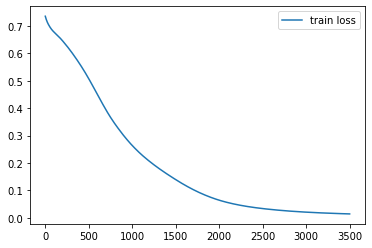

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses1, label='train loss')
plt.legend()
plt.show()

In [ ]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [ ]:
y_prediction=[]
with torch.no_grad():
    for i,x in enumerate(x_test):
        y_pred=model(x)
        y_pred=(y_pred>0.5).item()
        y_pred=int(y_pred)
        y_prediction.append(y_pred)
        print(y_pred)
        
len(y_prediction)
# another method 
# y_prediction=[]
# with torch.no_grad():
#     for i,x in enumerate(x_test):
#         y_pred=model(x)
#         y_pred = y_pred>0.5
#         y_pred = y_pred.int()
#         y_prediction.append(y_pred)
#         print(y_pred)        

0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
1
0
0
1
0
1
0
0
1
0
0
1
0
0
1
1
0
1
1
1
0
0
1
1
0
1
1
1
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
0
1
0
1
0
0
1
1
1
1
0
1
0
0
0
0
1
1
0
0
0
1
1
0
1
1
0
0
0
1
0
0
0
1
0
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
0
1
0
1
0
1
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0
1
0
1
1
0
0
1
0
0
1
1
1
1
0
0
1
1
1
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
0
0
1
0
1
1
1
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
0
0
1
1
0
1
0
1
1
1
1
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
0
0
0
0
1
1
1
0
0
1
1
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
1
1
1
0
1


343

In [ ]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_prediction)
cm

array([[191,   0],
       [  2, 150]])